# ***ΑΣΚΗΣΗ 3***

Decision Tree Accuracy: 0.9357
Random Forest Accuracy: 0.9532
Decision Tree and RF Feature Importances:
1:Tree 0.0000 	 RF 0.0273
2:Tree 0.0244 	 RF 0.0046
3:Tree 0.0000 	 RF 0.0555
4:Tree 0.0035 	 RF 0.0638
5:Tree 0.0000 	 RF 0.0025
6:Tree 0.0000 	 RF 0.0087
7:Tree 0.0000 	 RF 0.0868
8:Tree 0.0000 	 RF 0.0818
9:Tree 0.0000 	 RF 0.0008
10:Tree 0.0000 	 RF 0.0028
11:Tree 0.0000 	 RF 0.0127
12:Tree 0.0000 	 RF 0.0006
13:Tree 0.0000 	 RF 0.0086
14:Tree 0.0192 	 RF 0.0525
15:Tree 0.0000 	 RF 0.0009
16:Tree 0.0000 	 RF 0.0004
17:Tree 0.0000 	 RF 0.0039
18:Tree 0.0000 	 RF 0.0024
19:Tree 0.0089 	 RF 0.0002
20:Tree 0.0000 	 RF 0.0018
21:Tree 0.2116 	 RF 0.0626
22:Tree 0.0426 	 RF 0.0066
23:Tree 0.0000 	 RF 0.0858
24:Tree 0.0314 	 RF 0.1608
25:Tree 0.0000 	 RF 0.0039
26:Tree 0.0000 	 RF 0.0116
27:Tree 0.0108 	 RF 0.0488
28:Tree 0.6475 	 RF 0.1947
29:Tree 0.0000 	 RF 0.0057
30:Tree 0.0000 	 RF 0.0006


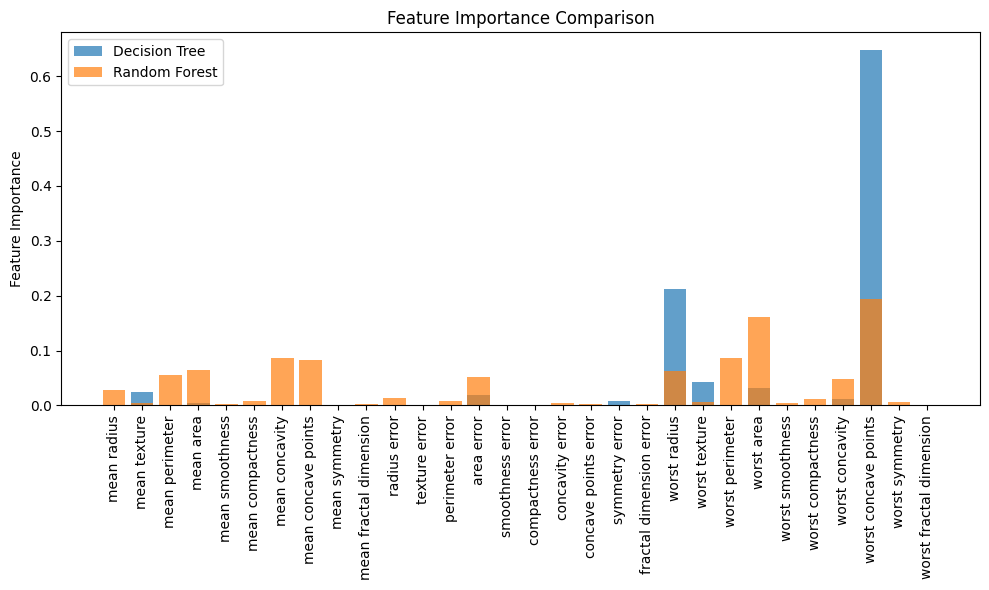

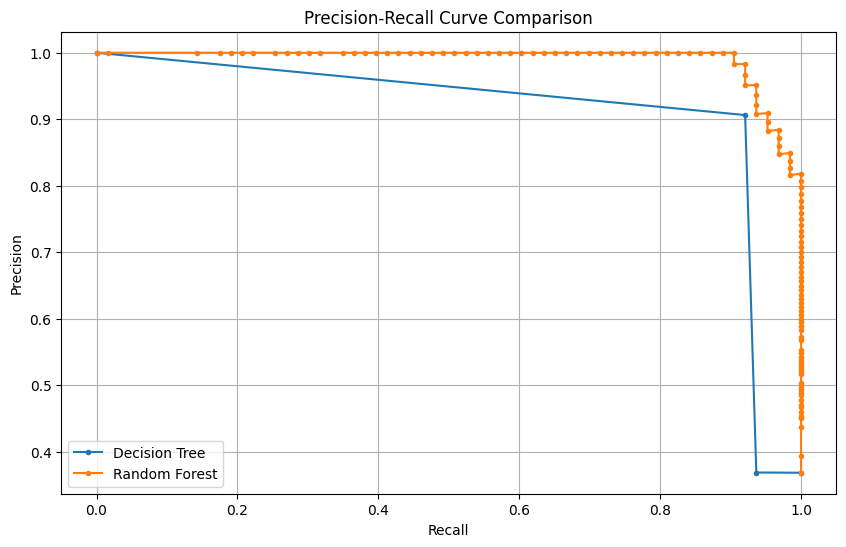

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)  # For numpy operations
import random
random.seed(seed)  # For random operations

# Function to simulate missing values in test set
def introduce_missing_values(X, percentage):
    missing_mask = np.random.rand(*X.shape) < percentage # Uniform distribution - every value equally likely to occur, so P(0<x0.1) = 0.1 so 10% of all training set
    X_missing = X.copy() # Use copy method so that they don't point to the same memory addresses
    X_missing[missing_mask] = np.nan # Use indices mask of booleans to determine which samples will turn into missing data
    return X_missing

# Load the Breast Cancer Wisconsin dataset
data = pd.read_csv("wdbc.data", header=None)
features = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
    'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',
    'mean fractal dimension', 'radius error', 'texture error', 'perimeter error',
    'area error', 'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
    'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry',
    'worst fractal dimension'
]


y = data.iloc[:, 1].map({'M': 1, 'B': 0}) # map M to 1 and B to 0
X = data.drop([0, 1], axis=1)

# Split into training and test sets and seed for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Introduce missing values in 10% of the training data
X_train_missing = introduce_missing_values(X_train, 0.1)

# Impute missing values with mean - for comparison to missing data
#imputer = SimpleImputer(strategy="mean") # Imputer object
#X_train_imputed = imputer.fit_transform(X_train_missing) # Parse fill_values with column means

# Train Decision Tree Classifier with seed for reproducability
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=seed) # Decision Tree object
clf_tree.fit(X_train_missing, y_train) # Fit onto the data and targets
y_pred_tree = clf_tree.predict(X_test) # Predict using test set
accuracy_tree = accuracy_score(y_test, y_pred_tree) # Returns accuracy = 1 - error = 1 - misses/#ofsapmples
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")

# Train Random Forest Classifier
clf_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    max_features=5,
    bootstrap=False,
    random_state=seed
)

clf_rf.fit(X_train_missing, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Print the important features and their importance scores
importance_tree = clf_tree.feature_importances_
importance_rf = clf_rf.feature_importances_

print("Decision Tree and RF Feature Importances:")
for feature, score_tree, score_rf in zip(X.columns-1, importance_tree, importance_rf):
    print(f"{feature}:Tree {score_tree:.4f} \t RF {score_rf:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_tree)), importance_tree, alpha=0.7, label="Decision Tree")
plt.bar(range(len(importance_rf)), importance_rf, alpha=0.7, label="Random Forest")
plt.xticks(range(len(X.columns)), features, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall Curves
precision_tree, recall_tree, _ = precision_recall_curve(y_test, clf_tree.predict_proba(X_test)[:, 1]) # use non-thresholded probabilities of estimates - non mandatory - can use label preds as before
precision_rf, recall_rf, _ = precision_recall_curve(y_test, clf_rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall_tree, precision_tree, label="Decision Tree", marker=".")
plt.plot(recall_rf, precision_rf, label="Random Forest", marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


***ΕΡΩΤΗΜΑ Δ***

Αρχικά φαίνεται από το accuracy και για διαφορετικά seeds πως και τα δύο συστήματα είναι ανθεκτικά σε missing data, όπως και αναμενόταν. Ο λόγος είναι πως τα RF συστήματα έχουν πολλούς estimators που καταλήγουν σε δικές τους αποφάσεις για τα δεδομένα και στο τέλος γίνεται συμψηφισμός τους με διάφορες τεχνικές, πράγμα που εξομαλύνει τυχόν ασυνέχεις που προκύπτουν από απώλειες δεδομένων. Τα decision trees από την άλλη έχουν σαν κύριο γνώμονα απόφασης ένα dominant χαρακτηριστικό, οπότε σε περίπτωση απουσίας του αξιοποιούνται τα αμέσως επόμενα σε ισχύ.

Αυτά τα στοιχεία εξηγούν και τον λόγο που το μοντέλο RF αξιοποιεί περισσότερα χαρακτηριστικά, αφού συγκεντρώνει τις αποφάσεις πολλαπλών εκτιμητών που μπορεί να αξιοποιούν διαφορετικά χαρακτηριστικά. Για αυτόν τον λόγο επίσης το decision tree έχει πολύ μεγαλύτερη επιρροή, αλλά από πολύ μικρότερα χαρακτηριστικά.


***ΕΡΩΤΗΜΑ ΣΤ***

Η καμπύλη του RF βρίσκεται μονίμως πάνω από αυτή του δέντρου απόφασης άρα καταλαμβάνει μεγαλύτερο χωρίο (μεγαλύτερο AUC-PR), ενώ παράλληλα η RF βρίσκεται πιο κοντά στην πάνω-δεξιά μεριά του γραφήματος που υποδεικνύει υψηλό TPR & FNR.
Άρα το μοντέλο RF φαίνεται να απέδωσε καλύτερα.

Όσον αφορά τα χαρακτηριστικά που πρέπει να επηρεάζουν περισσότερο τη συμπεριφορά του συστήματος, δεδομένης της εφαρμογής και τις επιπτώσεις που μπορούν να φέρουν οι αποφάσεις του, είναι λογικό να είναι επιθυμητό να είναι πιο συντηρητικό κατά τις αποφάσεις του, δηλαδή να δίνεται μεγαλύτερη βαρύτητα σε χαρακτηριστικά που θα μπορούσαν να οδηγήσουν πιο γρήγορα και ξεκάθαρα σε (έστω και εσφαλμένα) θετικά αποτελέσματα (όπου θετικό εννοείται η ύπαρξη κακοήθη όγκου).



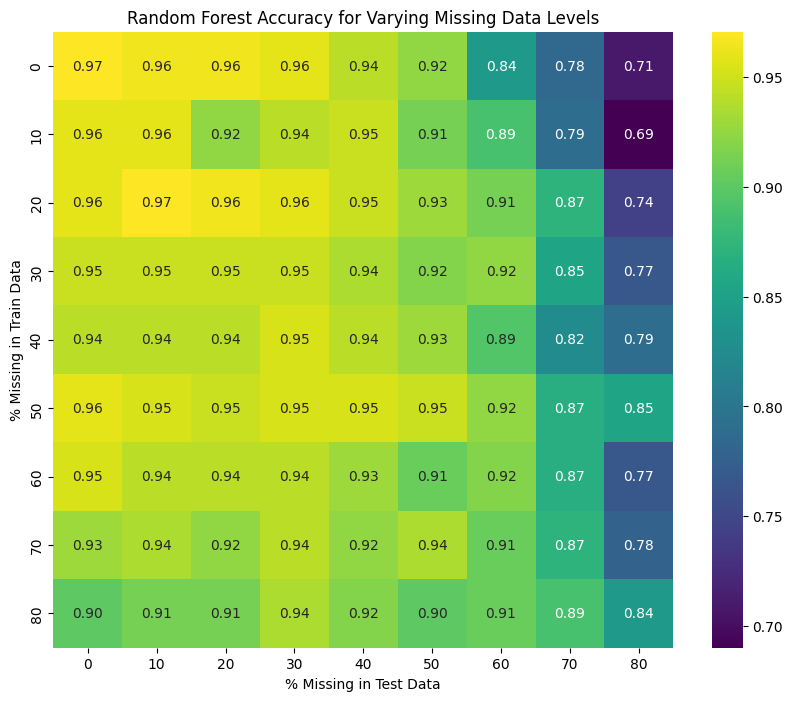

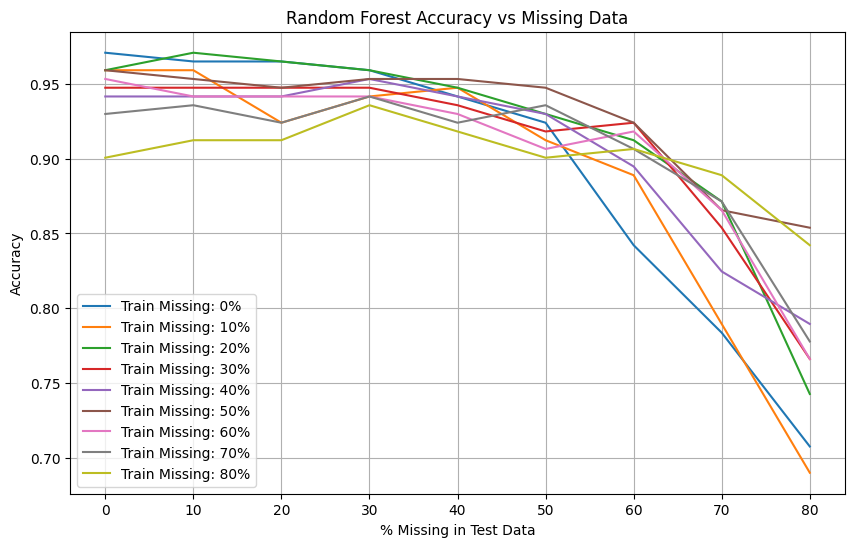

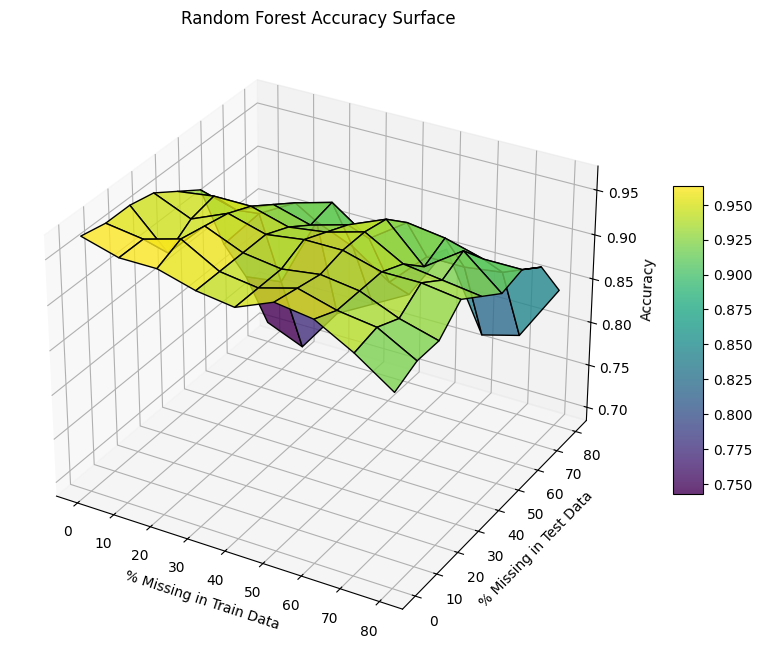

In [15]:
import seaborn as sns

# Parameters
train_missing_levels = np.arange(0, 0.9, 0.1)  # 0% to 80% missing in training data
test_missing_levels = np.arange(0, 0.9, 0.1)   # 0% to 80% missing in test data
accuracies = np.zeros((len(train_missing_levels), len(test_missing_levels)))

# Iterate over different levels of missing data in training
for i, train_missing in enumerate(train_missing_levels):
    # Introduce missing values in training set
    X_train_missing = introduce_missing_values(X_train, train_missing)

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train_missing)

    # Train Random Forest
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=42)
    clf_rf.fit(X_train_imputed, y_train)

    # Iterate over different levels of missing data in test set
    for j, test_missing in enumerate(test_missing_levels):
        # Introduce missing values in test set
        X_test_missing = introduce_missing_values(X_test, test_missing)

        # Impute missing values
        X_test_imputed = imputer.transform(X_test_missing)

        # Predict and compute accuracy
        y_pred_rf = clf_rf.predict(X_test_imputed)
        accuracies[i, j] = accuracy_score(y_test, y_pred_rf)

# Plot accuracy heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracies, annot=True, fmt=".2f", xticklabels=(test_missing_levels * 100).astype(int), yticklabels=(train_missing_levels * 100).astype(int), cmap="viridis")
plt.xlabel("% Missing in Test Data")
plt.ylabel("% Missing in Train Data")
plt.title("Random Forest Accuracy for Varying Missing Data Levels")
plt.show()

# Plot overall trends of accuracy for missing levels
plt.figure(figsize=(10, 6))
for i, train_missing in enumerate(train_missing_levels):
    plt.plot(test_missing_levels * 100, accuracies[i, :], label=f"Train Missing: {int(train_missing * 100)}%")

plt.xlabel("% Missing in Test Data")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Missing Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3D surface of accuracies
train_grid, test_grid = np.meshgrid(train_missing_levels * 100, test_missing_levels * 100, indexing="ij")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(train_grid, test_grid, accuracies, cmap="viridis", edgecolor='k', alpha=0.8)
ax.set_xlabel("% Missing in Train Data")
ax.set_ylabel("% Missing in Test Data")
ax.set_zlabel("Accuracy")
ax.set_title("Random Forest Accuracy Surface")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()



***ΕΡΩΤΗΜΑ Ε***

Με την απεικόνιση του heatmap είναι φανερή πως η απόδοσή του παρουσιάζει μεγαλύτερη ευαισθησία στην απουσία δεδομένων από το test set. Αυτό πιθανότατα συμβαίνει διότι το test set όντας ήδη μικρό συγκριτικά του training set, όταν παρουσιάζει τόσο μεγάλη απώλεια δεδομένων, δεν υπάρχουν αρκετά δείγματα για να αποφανθούμε για τη πραγματική απόδοσή του. Αυτό ωστόσο είναι δευτερεύον λόγος και ένα καλό σύστημα, σε τέτοιου τύπου πρακτικές εφαρμογές πρέπει ακόμα και για μικρό test set να αποδίδει επαρκώς. Ο πιο σημαντικός λόγος ίσως είναι πως η πλήρης παρουσία του training set καθιστά όλα τα χαρακτηριστικά πιθανούς μετόχους στην απόφαση του συστήματος. Όταν το σύστημα λοιπόν εκπαιδεύεται κατά αυτόν τον τρόπο και μάλιστα κάποια από αυτά τα χαρακτηριστικά είναι κυρίαρχα, σε περίπτωση απώλειας από το test set, εφόσον το σύστημα δεν έχει εκπαιδευτεί να τα διαχειρίζεται δίνοντας μεγαλύτερη ισχύ σε άλλα χαρακτηριστικά, οδηγείται σε σφάλμα.